Форма изображения: (131, 175, 3)


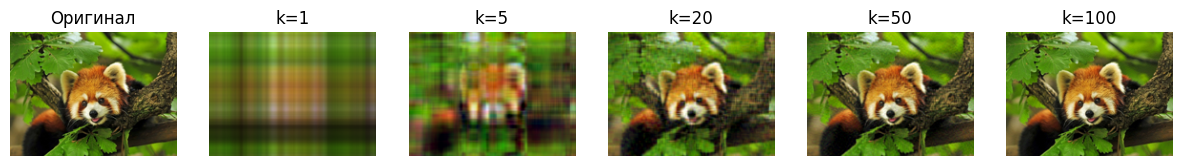

k=1: исходное хранение=68775, после SVD=921 (~1.34% от исходного)
k=5: исходное хранение=68775, после SVD=4605 (~6.70% от исходного)
k=20: исходное хранение=68775, после SVD=18420 (~26.78% от исходного)
k=50: исходное хранение=68775, после SVD=46050 (~66.96% от исходного)
k=100: исходное хранение=68775, после SVD=92100 (~133.91% от исходного)


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("panda.jpg")
w, h = img.size
img = img.resize((w // 4, h // 4))

X = np.array(img, dtype=np.float32)
m, n = X.shape[:2]
print("Форма изображения:", X.shape)


def svd_compress_channel(channel, k):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    return U[:, :k] @ np.diag(S[:k]) @ Vt[:k, :]


def svd_compress_image(X, k):
    if len(X.shape) == 2:
        return svd_compress_channel(X, k)
    else:
        channels = []
        for i in range(3):
            channels.append(svd_compress_channel(X[:, :, i], k))
        return np.clip(np.stack(channels, axis=2), 0, 255)

def storage_size(m, n, k, channels=3):
    original = m * n * channels
    compressed = channels * (k * (m + n + 1))
    return original, compressed

ks = [1, 5, 20, 50, 100]
fig, axes = plt.subplots(1, len(ks)+1, figsize=(15, 5))


axes[0].imshow(X.astype(np.uint8))
axes[0].set_title("Оригинал")
axes[0].axis("off")

for j, k in enumerate(ks):
    Y = svd_compress_image(X, k)
    axes[j+1].imshow(Y.astype(np.uint8))
    axes[j+1].set_title(f"k={k}")
    axes[j+1].axis("off")

plt.show()

for k in ks:
    orig, comp = storage_size(m, n, k, channels=3)
    ratio = comp / orig * 100
    print(f"k={k}: исходное хранение={orig}, после SVD={comp} ")
